# Reshaping and pivot tables

## Reshaping by pivoting DataFrame objects

In [354]:
import pandas as pd
import numpy as np
import seaborn as sns

In [355]:
date = pd.date_range(start='2000-01-03', periods=12)
df = pd.DataFrame({'date': date, 
                   'variable': list('A') * 4 + list('B')  * 4 + list('C') * 4,
                   'value': np.random.randn(12)})

In [356]:
df

,date,variable,value
0,2000-01-03,A,0.758409
1,2000-01-04,A,-0.710817
2,2000-01-05,A,1.351699
3,2000-01-06,A,0.632514
4,2000-01-07,B,-2.494630
5,2000-01-08,B,-0.527271
6,2000-01-09,B,-0.758224
7,2000-01-10,B,-0.257965
8,2000-01-11,C,-0.675804
9,2000-01-12,C,-0.442854


In [357]:
df.pivot(index='date', columns='variable')

value                    
variable           A         B         C
date                                    
2000-01-03  0.758409       NaN       NaN
2000-01-04 -0.710817       NaN       NaN
2000-01-05  1.351699       NaN       NaN
2000-01-06  0.632514       NaN       NaN
2000-01-07       NaN -2.494630       NaN
2000-01-08       NaN -0.527271       NaN
2000-01-09       NaN -0.758224       NaN
2000-01-10       NaN -0.257965       NaN
2000-01-11       NaN       NaN -0.675804
2000-01-12       NaN       NaN -0.442854
2000-01-13       NaN       NaN -1.008933
2000-01-14       NaN       NaN -0.269235

In [358]:
df['value2'] = df['value']**2

In [359]:
df

,date,variable,value,value2
0,2000-01-03,A,0.758409,0.575184
1,2000-01-04,A,-0.710817,0.505261
2,2000-01-05,A,1.351699,1.827092
3,2000-01-06,A,0.632514,0.400075
4,2000-01-07,B,-2.494630,6.223176
5,2000-01-08,B,-0.527271,0.278015
6,2000-01-09,B,-0.758224,0.574903
7,2000-01-10,B,-0.257965,0.066546
8,2000-01-11,C,-0.675804,0.456711
9,2000-01-12,C,-0.442854,0.196120


In [360]:
df.pivot(index='date', columns='variable')

value                        value2                    
variable           A         B         C         A         B         C
date                                                                  
2000-01-03  0.758409       NaN       NaN  0.575184       NaN       NaN
2000-01-04 -0.710817       NaN       NaN  0.505261       NaN       NaN
2000-01-05  1.351699       NaN       NaN  1.827092       NaN       NaN
2000-01-06  0.632514       NaN       NaN  0.400075       NaN       NaN
2000-01-07       NaN -2.494630       NaN       NaN  6.223176       NaN
2000-01-08       NaN -0.527271       NaN       NaN  0.278015       NaN
2000-01-09       NaN -0.758224       NaN       NaN  0.574903       NaN
2000-01-10       NaN -0.257965       NaN       NaN  0.066546       NaN
2000-01-11       NaN       NaN -0.675804       NaN       NaN  0.456711
2000-01-12       NaN       NaN -0.442854       NaN       NaN  0.196120
2000-01-13       NaN       NaN -1.008933       NaN       NaN  1.017945
2000-01-14       NaN       NaN -0.269235       NaN       NaN  0.072488

In [361]:
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

In [362]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [363]:
tips.pivot(columns='sex', values=['total_bill', 'tip'])

total_bill           tip      
sex     Female   Male Female  Male
0        16.99    NaN   1.01   NaN
1          NaN  10.34    NaN  1.66
2          NaN  21.01    NaN  3.50
3          NaN  23.68    NaN  3.31
4        24.59    NaN   3.61   NaN
..         ...    ...    ...   ...
239        NaN  29.03    NaN  5.92
240      27.18    NaN   2.00   NaN
241        NaN  22.67    NaN  2.00
242        NaN  17.82    NaN  1.75
243      18.78    NaN   3.00   NaN

[244 rows x 4 columns]

In [364]:
tips.pivot_table(values=['total_bill', 'tip'], columns='sex')

sex,Female,Male
tip,2.833448,3.089618
total_bill,18.056897,20.744076


In [365]:
tips.pivot_table(values=['total_bill', 'tip'], columns='sex', aggfunc=['mean', 'std', 'median'])

mean                  std           median       
sex            Female       Male    Female      Male Female   Male
tip          2.833448   3.089618  1.159495  1.489102   2.75   3.00
total_bill  18.056897  20.744076  8.009209  9.246469  16.40  18.35

In [366]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [367]:
tips.pivot_table(values=['total_bill', 'tip'], index='size', columns='sex', 
                 aggfunc=['mean', 'std', 'median'])

mean                                       std                       \
           tip           total_bill                  tip           total_bill   
sex     Female      Male     Female       Male    Female      Male     Female   
size                                                                            
1     1.276667  1.920000   6.796667   8.580000  0.479201       NaN   3.521950   
2     2.528448  2.614184  15.339483  17.104082  0.882510  1.044757   4.798400   
3     3.250000  3.476667  21.547143  24.287083  1.291398  1.714419   9.100667   
4     4.021111  4.172143  30.278889  28.078214  1.084924  1.798484   7.257022   
5     5.140000  3.750000  29.850000  30.122500       NaN  1.500000        NaN   
6     4.600000  5.850000  28.425000  41.235000  0.565685  1.202082   1.944544   

               median                            
                  tip        total_bill          
sex       Male Female   Male     Female    Male  
size                                             
1          NaN   1.00  1.920      7.250   8.580  
2     6.608159   2.50  2.405     14.415  15.750  
3     9.625980   3.15  3.380     17.610  21.915  
4     9.054547   3.75  3.880     30.140  25.725  
5     8.474792   5.14  4.000     29.850  29.305  
6     9.807571   4.60  5.850     28.425  41.235

In [459]:
tips.groupby('sex').sum()['total_bill']

sex
Female    1570.95
Male      3256.82
Name: total_bill, dtype: float64

In [461]:
tips.pivot_table(values='total_bill', index='sex', aggfunc=np.sum)

,total_bill
sex,
Female,1570.95
Male,3256.82


In [465]:
tips.pivot_table(values='total_bill', index=['sex', 'day', 'time'], aggfunc=[np.sum, np.mean])

sum       mean
                   total_bill total_bill
sex    day  time                        
Female Fri  Dinner      71.55  14.310000
            Lunch       55.76  13.940000
       Sat  Dinner     551.05  19.680357
       Sun  Dinner     357.70  19.872222
       Thur Dinner      18.78  18.780000
            Lunch      516.11  16.648710
Male   Fri  Dinner     164.41  23.487143
            Lunch       34.16  11.386667
       Sat  Dinner    1227.35  20.802542
       Sun  Dinner    1269.46  21.887241
       Thur Lunch      561.44  18.714667

In [471]:
tips.pivot_table(values='total_bill', index=['sex', 'day'], aggfunc=[np.median], 
                  fill_value=np.zeros)

median
            total_bill
sex    day            
Female Fri      15.380
       Sat      18.360
       Sun      17.410
       Thur     13.785
Male   Fri      17.215
       Sat      18.240
       Sun      20.725
       Thur     16.975

## Reshaping by stacking and unstacking

In [476]:
mpg = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [480]:
cars_small = mpg.set_index('name')[['weight', 'horsepower']].iloc[:10]

In [481]:
cars_small

,weight,horsepower
name,,
chevrolet chevelle malibu,3504,130.0
buick skylark 320,3693,165.0
plymouth satellite,3436,150.0
amc rebel sst,3433,150.0
ford torino,3449,140.0
ford galaxie 500,4341,198.0
chevrolet impala,4354,220.0
plymouth fury iii,4312,215.0
pontiac catalina,4425,225.0


In [484]:
cars_small.stack()

name                                 
chevrolet chevelle malibu  weight        3504.0
                           horsepower     130.0
buick skylark 320          weight        3693.0
                           horsepower     165.0
plymouth satellite         weight        3436.0
                           horsepower     150.0
amc rebel sst              weight        3433.0
                           horsepower     150.0
ford torino                weight        3449.0
                           horsepower     140.0
ford galaxie 500           weight        4341.0
                           horsepower     198.0
chevrolet impala           weight        4354.0
                           horsepower     220.0
plymouth fury iii          weight        4312.0
                           horsepower     215.0
pontiac catalina           weight        4425.0
                           horsepower     225.0
amc ambassador dpl         weight        3850.0
                           horsepower     190.0
dt

In [486]:
multi_name = tips.pivot_table(values='total_bill', index=['sex', 'day'], aggfunc=[np.mean, np.median, np.sum])

In [487]:
multi_name

mean     median        sum
            total_bill total_bill total_bill
sex    day                                  
Female Fri   14.145556     15.380     127.31
       Sat   19.680357     18.360     551.05
       Sun   19.872222     17.410     357.70
       Thur  16.715312     13.785     534.89
Male   Fri   19.857000     17.215     198.57
       Sat   20.802542     18.240    1227.35
       Sun   21.887241     20.725    1269.46
       Thur  18.714667     16.975     561.44

In [488]:
multi_name.columns

MultiIndex([(  'mean', 'total_bill'),
            ('median', 'total_bill'),
            (   'sum', 'total_bill')],
           )

In [492]:
multi_name.stack()

mean  median      sum
sex    day                                        
Female Fri  total_bill  14.145556  15.380   127.31
       Sat  total_bill  19.680357  18.360   551.05
       Sun  total_bill  19.872222  17.410   357.70
       Thur total_bill  16.715312  13.785   534.89
Male   Fri  total_bill  19.857000  17.215   198.57
       Sat  total_bill  20.802542  18.240  1227.35
       Sun  total_bill  21.887241  20.725  1269.46
       Thur total_bill  18.714667  16.975   561.44

In [495]:
multi_name.stack(level=0)

total_bill
sex    day                     
Female Fri  mean      14.145556
            median    15.380000
            sum      127.310000
       Sat  mean      19.680357
            median    18.360000
            sum      551.050000
       Sun  mean      19.872222
            median    17.410000
            sum      357.700000
       Thur mean      16.715312
            median    13.785000
            sum      534.890000
Male   Fri  mean      19.857000
            median    17.215000
            sum      198.570000
       Sat  mean      20.802542
            median    18.240000
            sum     1227.350000
       Sun  mean      21.887241
            median    20.725000
            sum     1269.460000
       Thur mean      18.714667
            median    16.975000
            sum      561.440000

In [496]:
multi_name.index

MultiIndex([('Female',  'Fri'),
            ('Female',  'Sat'),
            ('Female',  'Sun'),
            ('Female', 'Thur'),
            (  'Male',  'Fri'),
            (  'Male',  'Sat'),
            (  'Male',  'Sun'),
            (  'Male', 'Thur')],
           names=['sex', 'day'])

In [498]:
multi_name

mean     median        sum
            total_bill total_bill total_bill
sex    day                                  
Female Fri   14.145556     15.380     127.31
       Sat   19.680357     18.360     551.05
       Sun   19.872222     17.410     357.70
       Thur  16.715312     13.785     534.89
Male   Fri   19.857000     17.215     198.57
       Sat   20.802542     18.240    1227.35
       Sun   21.887241     20.725    1269.46
       Thur  18.714667     16.975     561.44

In [497]:
multi_name.unstack()

mean                                      median                 \
       total_bill                                  total_bill                  
day           Fri        Sat        Sun       Thur        Fri    Sat     Sun   
sex                                                                            
Female  14.145556  19.680357  19.872222  16.715312     15.380  18.36  17.410   
Male    19.857000  20.802542  21.887241  18.714667     17.215  18.24  20.725   

                      sum                            
               total_bill                            
day       Thur        Fri      Sat      Sun    Thur  
sex                                                  
Female  13.785     127.31   551.05   357.70  534.89  
Male    16.975     198.57  1227.35  1269.46  561.44

In [499]:
multi_name.unstack(0)

mean                median                sum         
     total_bill            total_bill         total_bill         
sex      Female       Male     Female    Male     Female     Male
day                                                              
Fri   14.145556  19.857000     15.380  17.215     127.31   198.57
Sat   19.680357  20.802542     18.360  18.240     551.05  1227.35
Sun   19.872222  21.887241     17.410  20.725     357.70  1269.46
Thur  16.715312  18.714667     13.785  16.975     534.89   561.44

In [368]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
      ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'one']]))

In [369]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [370]:
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'one')],
           names=['first', 'second'])

In [371]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [372]:
df

A         B
first second                    
bar   one    -1.160465 -1.941429
      two    -0.701594  0.031515
baz   one     1.084846  0.370228
      two    -0.524627  0.886644
foo   one     1.856220 -1.048007
      two    -0.560497 -0.943324
qux   one    -0.675577 -0.062238
      one    -1.379927  1.602879

In [373]:
df2 = df[:4]

In [374]:
df2

A         B
first second                    
bar   one    -1.160465 -1.941429
      two    -0.701594  0.031515
baz   one     1.084846  0.370228
      two    -0.524627  0.886644

In [375]:
df2.stack()

first  second   
bar    one     A   -1.160465
               B   -1.941429
       two     A   -0.701594
               B    0.031515
baz    one     A    1.084846
               B    0.370228
       two     A   -0.524627
               B    0.886644
dtype: float64

In [376]:
df.stack()

first  second   
bar    one     A   -1.160465
               B   -1.941429
       two     A   -0.701594
               B    0.031515
baz    one     A    1.084846
               B    0.370228
       two     A   -0.524627
               B    0.886644
foo    one     A    1.856220
               B   -1.048007
       two     A   -0.560497
               B   -0.943324
qux    one     A   -0.675577
               B   -0.062238
               A   -1.379927
               B    1.602879
dtype: float64

In [377]:
df2.stack().unstack()

A         B
first second                    
bar   one    -1.160465 -1.941429
      two    -0.701594  0.031515
baz   one     1.084846  0.370228
      two    -0.524627  0.886644

In [378]:
df2.stack().unstack(0)

first          bar       baz
second                      
one    A -1.160465  1.084846
       B -1.941429  0.370228
two    A -0.701594 -0.524627
       B  0.031515  0.886644

In [379]:
df2.stack().unstack(1)

second        one       two
first                      
bar   A -1.160465 -0.701594
      B -1.941429  0.031515
baz   A  1.084846 -0.524627
      B  0.370228  0.886644

In [380]:
df2

A         B
first second                    
bar   one    -1.160465 -1.941429
      two    -0.701594  0.031515
baz   one     1.084846  0.370228
      two    -0.524627  0.886644

In [381]:
df2.stack()

first  second   
bar    one     A   -1.160465
               B   -1.941429
       two     A   -0.701594
               B    0.031515
baz    one     A    1.084846
               B    0.370228
       two     A   -0.524627
               B    0.886644
dtype: float64

In [382]:
df2.stack().unstack()

A         B
first second                    
bar   one    -1.160465 -1.941429
      two    -0.701594  0.031515
baz   one     1.084846  0.370228
      two    -0.524627  0.886644

In [383]:
df2.stack().unstack(0)

first          bar       baz
second                      
one    A -1.160465  1.084846
       B -1.941429  0.370228
two    A -0.701594 -0.524627
       B  0.031515  0.886644

In [384]:
df2.stack().unstack(1)

second        one       two
first                      
bar   A -1.160465 -0.701594
      B -1.941429  0.031515
baz   A  1.084846 -0.524627
      B  0.370228  0.886644

### Multiple levels

In [385]:
columns = pd.MultiIndex.from_tuples([('A', 'cat', 'long'), 
                                     ('B', 'cat', 'long'),
                                     ('A', 'dog', 'short'),
                                     ('B', 'dog', 'short')],
                                    names=['exp', 'animal', 'hair_length'])

In [386]:
columns

MultiIndex([('A', 'cat',  'long'),
            ('B', 'cat',  'long'),
            ('A', 'dog', 'short'),
            ('B', 'dog', 'short')],
           names=['exp', 'animal', 'hair_length'])

In [387]:
df = pd.DataFrame(np.random.randn(4, 4), columns=columns)

In [388]:
df

exp,A,B,A,B
animal,cat,cat,dog,dog
hair_length,long,long,short,short
0,-1.315435,1.369022,0.685370,0.678779
1,0.570393,3.112482,0.980987,-0.641783
2,-1.028096,1.342477,0.273528,0.682006
3,-0.601216,1.074921,0.545678,-0.521181


In [389]:
df.stack(level='exp')

animal            cat       dog
hair_length      long     short
  exp                          
0 A         -1.315435  0.685370
  B          1.369022  0.678779
1 A          0.570393  0.980987
  B          3.112482 -0.641783
2 A         -1.028096  0.273528
  B          1.342477  0.682006
3 A         -0.601216  0.545678
  B          1.074921 -0.521181

In [390]:
df.stack(level='animal')

exp                 A                   B          
hair_length      long     short      long     short
  animal                                           
0 cat       -1.315435       NaN  1.369022       NaN
  dog             NaN  0.685370       NaN  0.678779
1 cat        0.570393       NaN  3.112482       NaN
  dog             NaN  0.980987       NaN -0.641783
2 cat       -1.028096       NaN  1.342477       NaN
  dog             NaN  0.273528       NaN  0.682006
3 cat       -0.601216       NaN  1.074921       NaN
  dog             NaN  0.545678       NaN -0.521181

In [391]:
df.stack(level='hair_length')

exp                   A                   B          
animal              cat       dog       cat       dog
  hair_length                                        
0 long        -1.315435       NaN  1.369022       NaN
  short             NaN  0.685370       NaN  0.678779
1 long         0.570393       NaN  3.112482       NaN
  short             NaN  0.980987       NaN -0.641783
2 long        -1.028096       NaN  1.342477       NaN
  short             NaN  0.273528       NaN  0.682006
3 long        -0.601216       NaN  1.074921       NaN
  short             NaN  0.545678       NaN -0.521181

In [392]:
df.stack(level=['exp', 'animal'])

hair_length       long     short
  exp animal                    
0 A   cat    -1.315435       NaN
      dog          NaN  0.685370
  B   cat     1.369022       NaN
      dog          NaN  0.678779
1 A   cat     0.570393       NaN
      dog          NaN  0.980987
  B   cat     3.112482       NaN
      dog          NaN -0.641783
2 A   cat    -1.028096       NaN
      dog          NaN  0.273528
  B   cat     1.342477       NaN
      dog          NaN  0.682006
3 A   cat    -0.601216       NaN
      dog          NaN  0.545678
  B   cat     1.074921       NaN
      dog          NaN -0.521181

In [393]:
df.stack(level=[1, 2])

exp                          A         B
  animal hair_length                    
0 cat    long        -1.315435  1.369022
  dog    short        0.685370  0.678779
1 cat    long         0.570393  3.112482
  dog    short        0.980987 -0.641783
2 cat    long        -1.028096  1.342477
  dog    short        0.273528  0.682006
3 cat    long        -0.601216  1.074921
  dog    short        0.545678 -0.521181

### Missing data

In [394]:
columns = pd.MultiIndex.from_tuples([('A', 'cat'), ('B', 'dog'), 
                                     ('B', 'cat'), ('A', 'dog')],
                                    names=['exp', 'animal'])

In [395]:
index = pd.MultiIndex.from_product([('bar', 'baz', 'foo', 'qux'),
                                    ('one', 'two')],
                                   names=['first', 'second'])

In [396]:
df = pd.DataFrame(np.random.randn(8, 4), index=index, columns=columns)

In [397]:
df

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one     0.196646 -0.027319 -0.496852 -0.894663
      two    -0.866898 -1.133368 -1.376191 -0.691672
baz   one    -1.251520 -0.140059 -0.679459 -0.269111
      two     1.343164 -0.475746  1.490689  0.147531
foo   one     0.703139 -0.034323 -0.183433  1.064132
      two     0.098734 -0.018218  0.507198  0.515885
qux   one    -0.499164 -0.627875 -0.297586 -0.598520
      two    -1.162143  0.560493  1.534033 -0.577740

In [398]:
df2 = df.iloc[[0, 1, 2, 4, 5, 7]]

In [399]:
df2

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one     0.196646 -0.027319 -0.496852 -0.894663
      two    -0.866898 -1.133368 -1.376191 -0.691672
baz   one    -1.251520 -0.140059 -0.679459 -0.269111
foo   one     0.703139 -0.034323 -0.183433  1.064132
      two     0.098734 -0.018218  0.507198  0.515885
qux   two    -1.162143  0.560493  1.534033 -0.577740

In [400]:
df2.stack(level='exp')

animal                 cat       dog
first second exp                    
bar   one    A    0.196646 -0.894663
             B   -0.496852 -0.027319
      two    A   -0.866898 -0.691672
             B   -1.376191 -1.133368
baz   one    A   -1.251520 -0.269111
             B   -0.679459 -0.140059
foo   one    A    0.703139  1.064132
             B   -0.183433 -0.034323
      two    A    0.098734  0.515885
             B    0.507198 -0.018218
qux   two    A   -1.162143 -0.577740
             B    1.534033  0.560493

In [401]:
df2.stack('animal')

exp                         A         B
first second animal                    
bar   one    cat     0.196646 -0.496852
             dog    -0.894663 -0.027319
      two    cat    -0.866898 -1.376191
             dog    -0.691672 -1.133368
baz   one    cat    -1.251520 -0.679459
             dog    -0.269111 -0.140059
foo   one    cat     0.703139 -0.183433
             dog     1.064132 -0.034323
      two    cat     0.098734  0.507198
             dog     0.515885 -0.018218
qux   two    cat    -1.162143  1.534033
             dog    -0.577740  0.560493

In [402]:
df3 = df.iloc[[0, 1, 4, 7], [1, 2]]

In [403]:
df3

exp                  B          
animal             dog       cat
first second                    
bar   one    -0.027319 -0.496852
      two    -1.133368 -1.376191
foo   one    -0.034323 -0.183433
qux   two     0.560493  1.534033

In [404]:
df3.unstack()

exp            B                              
animal       dog                 cat          
second       one       two       one       two
first                                         
bar    -0.027319 -1.133368 -0.496852 -1.376191
foo    -0.034323       NaN -0.183433       NaN
qux          NaN  0.560493       NaN  1.534033

### With a MultiIndex

In [405]:
df[:3]

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one     0.196646 -0.027319 -0.496852 -0.894663
      two    -0.866898 -1.133368 -1.376191 -0.691672
baz   one    -1.251520 -0.140059 -0.679459 -0.269111

In [406]:
df[:3].unstack(1)

exp            A                   B                                       A  \
animal       cat                 dog                 cat                 dog   
second       one       two       one       two       one       two       one   
first                                                                          
bar     0.196646 -0.866898 -0.027319 -1.133368 -0.496852 -1.376191 -0.894663   
baz    -1.251520       NaN -0.140059       NaN -0.679459       NaN -0.269111   

exp               
animal            
second       two  
first             
bar    -0.691672  
baz          NaN

In [407]:
df[:3].unstack(0)

exp            A                  B                                       A  \
animal       cat                dog                 cat                 dog   
first        bar      baz       bar       baz       bar       baz       bar   
second                                                                        
one     0.196646 -1.25152 -0.027319 -0.140059 -0.496852 -0.679459 -0.894663   
two    -0.866898      NaN -1.133368       NaN -1.376191       NaN -0.691672   

exp               
animal            
first        baz  
second            
one    -0.269111  
two          NaN

## Reshaping by melt

In [408]:
cheese = pd.DataFrame({'first': ['John', 'Mary'],
                       'last': ['Doe', 'Bo'],
                       'height': [5.5, 6.0],
                       'weight': [130, 150]})

In [409]:
cheese

,first,last,height,weight
0,John,Doe,5.5,130
1,Mary,Bo,6.0,150


In [410]:
cheese.melt(id_vars=['first', 'last'])

,first,last,variable,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [411]:
cheese.melt(id_vars=['height', 'weight'])

,height,weight,variable,value
0,5.5,130,first,John
1,6.0,150,first,Mary
2,5.5,130,last,Doe
3,6.0,150,last,Bo


In [412]:
cheese.pivot(index=['first', 'last'], columns='height')

weight       
height        5.5    6.0
first last              
John  Doe   130.0    NaN
Mary  Bo      NaN  150.0

In [413]:
index = pd.MultiIndex.from_tuples([('person', 'A'), ('person', 'B')])

In [414]:
cheese = pd.DataFrame({'first': ['John', 'Mary'],
                       'last': ['Doe', 'Bo'],
                       'height': [5.5, 6.0],
                       'weight': [130, 150]},
                      index=index)

In [415]:
cheese

first last  height  weight
person A  John  Doe     5.5     130
       B  Mary   Bo     6.0     150

In [416]:
cheese.melt(id_vars=['first', 'last'])

,first,last,variable,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [417]:
cheese.melt(id_vars=['first', 'last'], ignore_index=False)

first last variable  value
person A  John  Doe   height    5.5
       B  Mary   Bo   height    6.0
       A  John  Doe   weight  130.0
       B  Mary   Bo   weight  150.0

In [418]:
dft = pd.DataFrame({'A1970': {0: 'a', 1: 'b', 2: 'c'},
                    'A1980': {0: 'd', 1: 'e', 2: 'f'},
                    'B1970': {0: 2.5, 1: 1.2, 2: .7},
                    'B1980': {0: 3.2, 1: 1.3, 2: .1},
                    'X': dict(zip(range(3), np.random.randn(3)))})

In [419]:
dft

,A1970,A1980,B1970,B1980,X
0,a,d,2.5,3.2,-1.443267
1,b,e,1.2,1.3,0.696423
2,c,f,0.7,0.1,-0.688418


In [420]:
dft['id'] = dft.index

In [421]:
dft

,A1970,A1980,B1970,B1980,X,id
0,a,d,2.5,3.2,-1.443267,0
1,b,e,1.2,1.3,0.696423,1
2,c,f,0.7,0.1,-0.688418,2


In [422]:
pd.wide_to_long(dft, stubnames=['A', 'B'], i='id', j='year')

,,X,A,B
id,year,,,
0,1970,-1.443267,a,2.5
1,1970,0.696423,b,1.2
2,1970,-0.688418,c,0.7
0,1980,-1.443267,d,3.2
1,1980,0.696423,e,1.3
2,1980,-0.688418,f,0.1


In [423]:
df_wide = pd.DataFrame({'student': ['Jesson', 'Aly', 'Gab', 'Trina'],
                        'school': ['DLSU', 'ADMU', 'UP', 'UA&P'],
                        'economics': [4.0, 3.5, 3.5, 3.5],
                        'math': [4.0, 4.0, 2.0, 2.5],
                        'law': [1.0, 1.5, 4.0, 4.0]})

In [424]:
df_wide

,student,school,economics,math,law
0,Jesson,DLSU,4.0,4.0,1.0
1,Aly,ADMU,3.5,4.0,1.5
2,Gab,UP,3.5,2.0,4.0
3,Trina,UA&P,3.5,2.5,4.0


In [425]:
df_long = df_wide.melt(id_vars=['student', 'school'], value_vars=['economics', 'math', 'law'], 
                       var_name='subject', value_name='grade').sort_values(by='student')

In [426]:
df_long

,student,school,subject,grade
1,Aly,ADMU,economics,3.5
5,Aly,ADMU,math,4.0
9,Aly,ADMU,law,1.5
2,Gab,UP,economics,3.5
6,Gab,UP,math,2.0
10,Gab,UP,law,4.0
0,Jesson,DLSU,economics,4.0
4,Jesson,DLSU,math,4.0
8,Jesson,DLSU,law,1.0
3,Trina,UA&P,economics,3.5


In [427]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [428]:
tips.melt(id_vars='tip', value_vars='sex')

,tip,variable,value
0,1.01,sex,Female
1,1.66,sex,Male
2,3.50,sex,Male
3,3.31,sex,Male
4,3.61,sex,Female
...,...,...,...
239,5.92,sex,Male
240,2.00,sex,Female
241,2.00,sex,Male
242,1.75,sex,Male


## Combining with stats and GroupBy

In [429]:
df

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one     0.196646 -0.027319 -0.496852 -0.894663
      two    -0.866898 -1.133368 -1.376191 -0.691672
baz   one    -1.251520 -0.140059 -0.679459 -0.269111
      two     1.343164 -0.475746  1.490689  0.147531
foo   one     0.703139 -0.034323 -0.183433  1.064132
      two     0.098734 -0.018218  0.507198  0.515885
qux   one    -0.499164 -0.627875 -0.297586 -0.598520
      two    -1.162143  0.560493  1.534033 -0.577740

In [430]:
df.stack()

exp                         A         B
first second animal                    
bar   one    cat     0.196646 -0.496852
             dog    -0.894663 -0.027319
      two    cat    -0.866898 -1.376191
             dog    -0.691672 -1.133368
baz   one    cat    -1.251520 -0.679459
             dog    -0.269111 -0.140059
      two    cat     1.343164  1.490689
             dog     0.147531 -0.475746
foo   one    cat     0.703139 -0.183433
             dog     1.064132 -0.034323
      two    cat     0.098734  0.507198
             dog     0.515885 -0.018218
qux   one    cat    -0.499164 -0.297586
             dog    -0.598520 -0.627875
      two    cat    -1.162143  1.534033
             dog    -0.577740  0.560493

In [431]:
df.stack().mean(1).unstack()

animal             cat       dog
first second                    
bar   one    -0.150103 -0.460991
      two    -1.121544 -0.912520
baz   one    -0.965489 -0.204585
      two     1.416927 -0.164107
foo   one     0.259853  0.514905
      two     0.302966  0.248834
qux   one    -0.398375 -0.613197
      two     0.185945 -0.008623

In [432]:
df.groupby(level=1, axis=1).mean()

animal             cat       dog
first second                    
bar   one    -0.150103 -0.460991
      two    -1.121544 -0.912520
baz   one    -0.965489 -0.204585
      two     1.416927 -0.164107
foo   one     0.259853  0.514905
      two     0.302966  0.248834
qux   one    -0.398375 -0.613197
      two     0.185945 -0.008623

In [433]:
df.stack().groupby(level=1).mean()

exp,A,B
second,,
one,-0.193633,-0.310863
two,-0.149142,0.136111


In [434]:
df.mean().unstack(0)

exp,A,B
animal,,
cat,-0.179755,0.062300
dog,-0.163020,-0.237052


## Pivot tables

In [435]:
import datetime

In [436]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 6,
                   'B': ['A', 'B', 'C'] * 8,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 4,
                   'D': np.random.randn(24),
                   'E': np.random.randn(24),
                   'F': [datetime.datetime(2013, i, 1) for i in range(1, 13)] + 
                   [datetime.datetime(2013, i, 15) for i in range(1, 13)]})

In [437]:
df

,A,B,C,D,E,F
0,one,A,foo,0.704525,-1.058892,2013-01-01
1,one,B,foo,1.466593,-0.570354,2013-02-01
2,two,C,foo,-0.174056,-1.936931,2013-03-01
3,three,A,bar,-0.585112,1.359972,2013-04-01
4,one,B,bar,0.194510,-0.556061,2013-05-01
5,one,C,bar,-0.268205,-1.024015,2013-06-01
6,two,A,foo,2.676477,0.949277,2013-07-01
7,three,B,foo,-0.946299,-0.063021,2013-08-01
8,one,C,foo,1.064936,1.370567,2013-09-01
9,one,A,bar,2.018458,-1.139176,2013-10-01


In [438]:
pd.pivot_table(df, values='D', index='B', columns=['A', 'C'], aggfunc=np.sum)

A       one               three                 two          
C       bar       foo       bar       foo       bar       foo
B                                                            
A  2.415073  0.305853 -0.526251       NaN       NaN  2.605870
B  1.461184  2.233907       NaN  0.684743 -1.418917       NaN
C  0.260214  2.078462  1.325758       NaN       NaN  0.336456

In [439]:
pd.pivot_table(df, values=['D', 'E'], index='B', columns=['A', 'C'], aggfunc=np.sum)

D                                                           E  \
A       one               three                 two                 one   
C       bar       foo       bar       foo       bar       foo       bar   
B                                                                         
A  2.415073  0.305853 -0.526251       NaN       NaN  2.605870 -1.860691   
B  1.461184  2.233907       NaN  0.684743 -1.418917       NaN -0.081501   
C  0.260214  2.078462  1.325758       NaN       NaN  0.336456 -2.998581   

                                                     
A               three                 two            
C       foo       bar       foo       bar       foo  
B                                                    
A -0.609979  1.311372       NaN       NaN  1.376623  
B -1.834551       NaN  0.537736 -2.045134       NaN  
C  1.462001 -0.049531       NaN       NaN -2.273740

In [440]:
pd.pivot_table(df, values=['D', 'E'], index='A', columns='C', aggfunc=np.sum)

D                   E          
C           bar       foo       bar       foo
A                                            
one    4.136470  4.618222 -4.940772 -0.982529
three  0.799507  0.684743  1.261841  0.537736
two   -1.418917  2.942326 -2.045134 -0.897117

In [441]:
pd.pivot_table(df, values='D', index=pd.Grouper(freq='M', key='F'), columns='C')

C,bar,foo
F,,
2013-01-31,NaN,0.152926
2013-02-28,NaN,1.116953
2013-03-31,NaN,0.168228
2013-04-30,-0.263125,NaN
2013-05-31,0.730592,NaN
2013-06-30,0.130107,NaN
2013-07-31,NaN,1.302935
2013-08-31,NaN,0.342372
2013-09-30,NaN,1.039231


In [442]:
table = pd.pivot_table(df, index=['A', 'B'], columns='C')
print(table.to_string(na_rep=''))

                D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A  1.207536  0.152926 -0.930345 -0.304989
      B  0.730592  1.116953 -0.040750 -0.917276
      C  0.130107  1.039231 -1.499290  0.731001
three A -0.263125            0.655686          
      B            0.342372            0.268868
      C  0.662879           -0.024765          
two   A            1.302935            0.688312
      B -0.709458           -1.022567          
      C            0.168228           -1.136870


### Adding margins

In [443]:
df.pivot_table(index=['A', 'B'], columns='C', margins=False, aggfunc=np.std)

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A  1.146817  0.780078  0.295331  1.066179
      B  0.758135  0.494465  0.728759  0.490622
      C  0.563299  0.036352  0.672141  0.904484
three A  0.455358       NaN  0.996010       NaN
      B       NaN  1.822455       NaN  0.469361
      C  0.519085       NaN  0.462895       NaN
two   A       NaN  1.942482       NaN  0.369061
      B  0.371507       NaN  1.591131       NaN
      C       NaN  0.484062       NaN  1.131457

In [444]:
df.pivot_table(index=['A', 'B'], columns='C', margins=True, aggfunc=np.std)

D                             E                    
C             bar       foo       All       bar       foo       All
A     B                                                            
one   A  1.146817  0.780078  1.005967  0.295331  1.066179  0.733718
      B  0.758135  0.494465  0.568196  0.728759  0.490622  0.716495
      C  0.563299  0.036352  0.617828  0.672141  0.904484  1.442690
three A  0.455358       NaN  0.455358  0.996010       NaN  0.996010
      B       NaN  1.822455  1.822455       NaN  0.469361  0.469361
      C  0.519085       NaN  0.519085  0.462895       NaN  0.462895
two   A       NaN  1.942482  1.942482       NaN  0.369061  0.369061
      B  0.371507       NaN  0.371507  1.591131       NaN  1.591131
      C       NaN  0.484062  0.484062       NaN  1.131457  1.131457
All      0.843849  0.995722  0.905320  1.011758  0.967509  0.965167

In [445]:
df_long

,student,school,subject,grade
1,Aly,ADMU,economics,3.5
5,Aly,ADMU,math,4.0
9,Aly,ADMU,law,1.5
2,Gab,UP,economics,3.5
6,Gab,UP,math,2.0
10,Gab,UP,law,4.0
0,Jesson,DLSU,economics,4.0
4,Jesson,DLSU,math,4.0
8,Jesson,DLSU,law,1.0
3,Trina,UA&P,economics,3.5


In [446]:
df_long.pivot_table(values='grade', index=['student', 'school'], columns='subject').reset_index()

subject,student,school,economics,law,math
0,Aly,ADMU,3.5,1.5,4.0
1,Gab,UP,3.5,4.0,2.0
2,Jesson,DLSU,4.0,1.0,4.0
3,Trina,UA&P,3.5,4.0,2.5


In [447]:
df_wide

,student,school,economics,math,law
0,Jesson,DLSU,4.0,4.0,1.0
1,Aly,ADMU,3.5,4.0,1.5
2,Gab,UP,3.5,2.0,4.0
3,Trina,UA&P,3.5,2.5,4.0


## Cross tabulations

In [508]:
diamonds = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [510]:
pd.crosstab(index=diamonds['cut'], columns=diamonds['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


In [512]:
pd.crosstab(index=diamonds['cut'], columns=diamonds['color'], 
            values=diamonds['price'], aggfunc=np.mean)

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,4291.061350,3682.312500,3827.003205,4239.254777,5135.683168,4685.445714,4975.655462
Good,3405.382175,3423.644159,3495.750275,4123.482204,4276.254986,5078.532567,4574.172638
Ideal,2629.094566,2597.550090,3374.939362,3720.706388,3889.334831,4451.970377,4918.186384
Premium,3631.292576,3538.914420,4324.890176,4500.742134,5216.706780,5946.180672,6294.591584
Very Good,3470.467284,3214.652083,3778.820240,3872.753806,4535.390351,5255.879568,5103.513274


In [514]:
cross_table = pd.crosstab(index=diamonds['cut'], columns=diamonds['color'],
                         values=diamonds['price'], aggfunc=np.mean).round(0)
cross_table

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,4291.0,3682.0,3827.0,4239.0,5136.0,4685.0,4976.0
Good,3405.0,3424.0,3496.0,4123.0,4276.0,5079.0,4574.0
Ideal,2629.0,2598.0,3375.0,3721.0,3889.0,4452.0,4918.0
Premium,3631.0,3539.0,4325.0,4501.0,5217.0,5946.0,6295.0
Very Good,3470.0,3215.0,3779.0,3873.0,4535.0,5256.0,5104.0


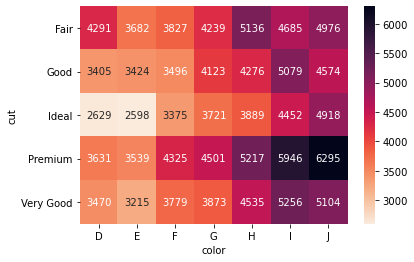

In [517]:
sns.heatmap(data=cross_table, cmap='rocket_r', annot=True, fmt='g')

In [518]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [519]:
diamonds.pivot_table(values='price', index='cut', columns='color', aggfunc=np.mean)

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,4291.061350,3682.312500,3827.003205,4239.254777,5135.683168,4685.445714,4975.655462
Good,3405.382175,3423.644159,3495.750275,4123.482204,4276.254986,5078.532567,4574.172638
Ideal,2629.094566,2597.550090,3374.939362,3720.706388,3889.334831,4451.970377,4918.186384
Premium,3631.292576,3538.914420,4324.890176,4500.742134,5216.706780,5946.180672,6294.591584
Very Good,3470.467284,3214.652083,3778.820240,3872.753806,4535.390351,5255.879568,5103.513274


In [500]:
foo, bar, dull, shiny, one, two = 'foo', 'bar', 'dull', 'shiny', 'one', 'two'
a = np.array([foo, foo, bar, bar, foo, foo], dtype=object)
b = np.array([one, one, two, one, two, one], dtype=object)
c = np.array([dull, dull, shiny, dull, dull, shiny], dtype=object)

In [501]:
pd.crosstab(a, [b, c], rownames='a', colnames=['b', 'c'])

b    one        two      
c   dull shiny dull shiny
a                        
bar    1     0    0     1
foo    2     1    1     0

In [502]:
df = pd.DataFrame({'A': [1, 2, 2, 2, 2], 'B': [3, 3, 4, 4, 4], 'C': [1, 1, np.nan, 1, 1]})
df

,A,B,C
0,1,3,1.0
1,2,3,1.0
2,2,4,NaN
3,2,4,1.0
4,2,4,1.0


In [503]:
pd.crosstab(df['A'], df['B'])

B,3,4
A,,
1,1,0
2,1,3


In [504]:
foo = pd.Categorical(['a', 'b'], categories=list('abc'))
bar = pd.Categorical(['d', 'e'], categories=list('def'))

In [505]:
pd.crosstab(foo, bar)

col_0,d,e
row_0,,
a,1,0
b,0,1


In [506]:
pd.crosstab(foo, bar, dropna=False)

col_0,d,e,f
row_0,,,
a,1,0,0
b,0,1,0
c,0,0,0


## Normalization

In [538]:
reindex = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
normalized_all = pd.crosstab(index=diamonds['cut'], columns=diamonds['color'], normalize='all')
normalized_all = normalized_all.reindex(labels=reindex)
normalized_all

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,0.052540,0.072358,0.070931,0.090545,0.057749,0.038802,0.016611
Premium,0.029718,0.043326,0.043215,0.054208,0.043752,0.026474,0.014980
Very Good,0.028050,0.044494,0.040119,0.042621,0.033815,0.022321,0.012570
Good,0.012273,0.017297,0.016852,0.016148,0.013014,0.009677,0.005692
Fair,0.003022,0.004153,0.005784,0.005821,0.005617,0.003244,0.002206


In [543]:
normalized_all.values.sum()

1.0000000000000002

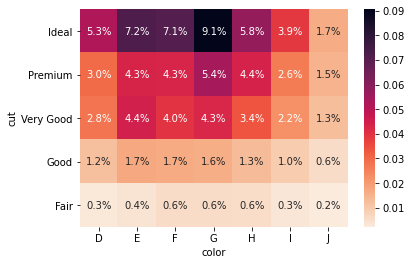

In [539]:
sns.heatmap(data=normalized_all, cmap='rocket_r', annot=True, fmt='.1%')

In [541]:
normalized_rows = pd.crosstab(index=diamonds['cut'], columns=diamonds['color'], normalize='index')
normalized_rows

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,0.101242,0.139130,0.193789,0.195031,0.188199,0.108696,0.073913
Good,0.134937,0.190175,0.185283,0.177538,0.143090,0.106400,0.062576
Ideal,0.131502,0.181105,0.177532,0.226625,0.144541,0.097118,0.041576
Premium,0.116235,0.169458,0.169023,0.212022,0.171126,0.103546,0.058589
Very Good,0.125228,0.198643,0.179109,0.190283,0.150968,0.099652,0.056117


In [555]:
normalized_rows.sum(axis=1)

cut
Fair         1.0
Good         1.0
Ideal        1.0
Premium      1.0
Very Good    1.0
dtype: float64

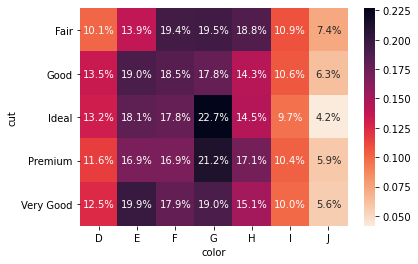

In [556]:
sns.heatmap(data=normalized_rows, cmap='rocket_r', annot=True, fmt='.1%')

In [557]:
normalized_columns = pd.crosstab(index=diamonds['cut'], columns=diamonds['color'], normalize='columns')
normalized_columns

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,0.024059,0.022864,0.032698,0.027807,0.036488,0.032276,0.042379
Good,0.097712,0.095233,0.095263,0.077134,0.084538,0.096274,0.109330
Ideal,0.418303,0.398387,0.400964,0.432519,0.375120,0.386020,0.319088
Premium,0.236605,0.238542,0.244288,0.258944,0.284200,0.263371,0.287749
Very Good,0.223321,0.244973,0.226787,0.203595,0.219653,0.222058,0.241453


In [558]:
normalized_columns.sum(axis=0)

color
D    1.0
E    1.0
F    1.0
G    1.0
H    1.0
I    1.0
J    1.0
dtype: float64

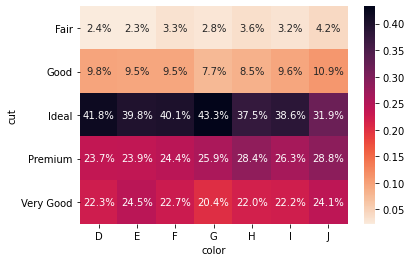

In [559]:
sns.heatmap(data=normalized_columns, cmap='rocket_r', annot=True, fmt='.1%')

## Computing indicator / dummy variables

In [563]:
pd.get_dummies(diamonds, columns=['cut']).head(10)

,carat,color,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0
1,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0
2,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0
3,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0
4,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0
5,0.24,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0,0,0,0,1
6,0.24,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,0,0,0,0,1
7,0.26,H,SI1,61.9,55.0,337,4.07,4.11,2.53,0,0,0,0,1
8,0.22,E,VS2,65.1,61.0,337,3.87,3.78,2.49,1,0,0,0,0
9,0.23,H,VS1,59.4,61.0,338,4.00,4.05,2.39,0,0,0,0,1
